In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from PIL import Image
from random import sample
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input as vgg_preprocess
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input as resnet_preprocess
from tensorflow.keras.applications.xception import Xception, preprocess_input as xception_preprocess
from tensorflow.keras.models import Model
from pathlib import Path
Image.LOAD_TRUNCATED_IMAGES = True
import requests
from io import BytesIO
import os
import time

In [3]:
# Đọc data từ file
listing_data = pd.read_csv("../input/farfetch-listings/current_farfetch_listings.csv")

# Data Analysis

In [4]:
listing_data.head()

,Unnamed: 0,availableSizes,brand.id,brand.name,gender,hasSimilarProducts,id,images.cutOut,images.model,isCustomizable,...,priceInfo.currencyCode,priceInfo.discountLabel,priceInfo.finalPrice,priceInfo.formattedFinalPrice,priceInfo.formattedInitialPrice,priceInfo.initialPrice,priceInfo.installmentsLabel,priceInfo.isOnSale,shortDescription,stockTotal
0,0,NaN,8360,Miu Miu,women,True,13415450,https://cdn-images.farfetch-contents.com/13/41...,https://cdn-images.farfetch-contents.com/13/41...,False,...,SGD,NaN,1080,"$1,080","$1,080",1080,NaN,False,logo print strap sandals,130
1,1,"[{'scaleId': 0, 'size': 'XXS'}, {'scaleId': 0,...",2049368,Self-Portrait,women,True,13784566,https://cdn-images.farfetch-contents.com/13/78...,https://cdn-images.farfetch-contents.com/13/78...,False,...,SGD,20% Off,392,$392,$490,490,NaN,True,embroidered midi dress,14
2,2,NaN,15514,Fendi,women,True,13377441,https://cdn-images.farfetch-contents.com/13/37...,https://cdn-images.farfetch-contents.com/13/37...,False,...,SGD,NaN,1245,"$1,245","$1,245",1245,NaN,False,FendiMania sock style sneakers,68
3,3,"[{'scaleId': 0, 'size': 'One Size'}]",49486,A.P.C.,women,False,13744082,https://cdn-images.farfetch-contents.com/13/74...,https://cdn-images.farfetch-contents.com/13/74...,False,...,SGD,20% Off,308,$308,$385,385,NaN,True,top zip wallet,1
4,4,NaN,34624,Prada,women,True,13668256,https://cdn-images.farfetch-contents.com/13/66...,https://cdn-images.farfetch-contents.com/13/66...,False,...,SGD,NaN,1248,"$1,248","$1,248",1248,NaN,False,slingback 65 pumps,78


In [5]:
# Kiểm tra shape (num_rows, num_colums)
listing_data.shape

(188817, 23)

In [6]:
# Bỏ cột: 0 column
listing_data.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
# Kiểm tra dtypes
listing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188817 entries, 0 to 188816
Data columns (total 22 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   availableSizes                   162711 non-null  object 
 1   brand.id                         188817 non-null  int64  
 2   brand.name                       188817 non-null  object 
 3   gender                           188817 non-null  object 
 4   hasSimilarProducts               188817 non-null  bool   
 5   id                               188817 non-null  int64  
 6   images.cutOut                    188817 non-null  object 
 7   images.model                     188817 non-null  object 
 8   isCustomizable                   188817 non-null  bool   
 9   merchandiseLabel                 56441 non-null   object 
 10  merchandiseLabelField            188817 non-null  object 
 11  merchantId                       188817 non-null  int64  
 12  pr

* Has priceInfo.installmentsLabel all null values.

In [8]:
# Bỏ cột priceInfo.installmentsLabel
listing_data.drop('priceInfo.installmentsLabel', axis=1, inplace=True)

In [9]:
# Kiểm tra % null của các cột
listing_data.isnull().sum() * 100 / listing_data.shape[0] 

availableSizes                     13.826086
brand.id                            0.000000
brand.name                          0.000000
gender                              0.000000
hasSimilarProducts                  0.000000
id                                  0.000000
images.cutOut                       0.000000
images.model                        0.000000
isCustomizable                      0.000000
merchandiseLabel                   70.108094
merchandiseLabelField               0.000000
merchantId                          0.000000
priceInfo.currencyCode              0.000000
priceInfo.discountLabel            63.834295
priceInfo.finalPrice                0.000000
priceInfo.formattedFinalPrice       0.000000
priceInfo.formattedInitialPrice     0.000000
priceInfo.initialPrice              0.000000
priceInfo.isOnSale                  0.000000
shortDescription                    0.000000
stockTotal                          0.000000
dtype: float64

In [10]:
# Kiểm tra các biến null
listing_data[~listing_data['merchandiseLabel'].isnull()].head()

,availableSizes,brand.id,brand.name,gender,hasSimilarProducts,id,images.cutOut,images.model,isCustomizable,merchandiseLabel,...,merchantId,priceInfo.currencyCode,priceInfo.discountLabel,priceInfo.finalPrice,priceInfo.formattedFinalPrice,priceInfo.formattedInitialPrice,priceInfo.initialPrice,priceInfo.isOnSale,shortDescription,stockTotal
9,"[{'scaleId': 0, 'size': 'XXS'}, {'scaleId': 0,...",1504165,Rejina Pyo,women,True,13777585,https://cdn-images.farfetch-contents.com/13/77...,https://cdn-images.farfetch-contents.com/13/77...,False,New Season,...,9359,SGD,NaN,989,$989,$989,989,False,Blake herringbone midi dress,16
11,"[{'scaleId': 0, 'size': 'XS'}, {'scaleId': 0, ...",2747,Chloé,women,True,13704528,https://cdn-images.farfetch-contents.com/13/70...,https://cdn-images.farfetch-contents.com/13/70...,False,New Season,...,9359,SGD,NaN,1790,"$1,790","$1,790",1790,False,pussy-bow rose-jacquard blouse,14
13,"[{'scaleId': 0, 'size': 'L'}, {'scaleId': 0, '...",168996,Pleats Please By Issey Miyake,women,True,14107224,https://cdn-images.farfetch-contents.com/14/10...,https://cdn-images.farfetch-contents.com/14/10...,False,New Season,...,9359,SGD,NaN,657,$657,$657,657,False,pleated midi dress,13
15,NaN,769627,Burberry,women,True,13970008,https://cdn-images.farfetch-contents.com/13/97...,https://cdn-images.farfetch-contents.com/13/97...,False,New Season,...,9359,SGD,NaN,1000,"$1,000","$1,000",1000,False,Margrette 50mm cow print pumps,10
18,"[{'scaleId': 0, 'size': 'XS'}, {'scaleId': 0, ...",2765,Alexander McQueen,women,True,13951735,https://cdn-images.farfetch-contents.com/13/95...,https://cdn-images.farfetch-contents.com/13/95...,False,New Season,...,9359,SGD,NaN,3330,"$3,330","$3,330",3330,False,tie-neck houndstooth midi-dress,2


In [11]:
# Kiểm tra các nhóm trong merchandiseLabel
listing_data['merchandiseLabel'].value_counts()

merchandiseLabel
New Season              41469
Positively Conscious    12324
Permanent Collection     1275
Seasonal Pick             741
Exclusive                 632
Name: count, dtype: int64

In [12]:
# Bỏ cột merchandiseLabel
listing_data.drop('merchandiseLabel', axis=1, inplace=True)

In [13]:
# Phân tích cột priceInfo.discountLabel
listing_data[listing_data['priceInfo.discountLabel'].isnull()].head()

,availableSizes,brand.id,brand.name,gender,hasSimilarProducts,id,images.cutOut,images.model,isCustomizable,merchandiseLabelField,merchantId,priceInfo.currencyCode,priceInfo.discountLabel,priceInfo.finalPrice,priceInfo.formattedFinalPrice,priceInfo.formattedInitialPrice,priceInfo.initialPrice,priceInfo.isOnSale,shortDescription,stockTotal
0,NaN,8360,Miu Miu,women,True,13415450,https://cdn-images.farfetch-contents.com/13/41...,https://cdn-images.farfetch-contents.com/13/41...,False,NoTag,9359,SGD,NaN,1080,"$1,080","$1,080",1080,False,logo print strap sandals,130
2,NaN,15514,Fendi,women,True,13377441,https://cdn-images.farfetch-contents.com/13/37...,https://cdn-images.farfetch-contents.com/13/37...,False,NoTag,9140,SGD,NaN,1245,"$1,245","$1,245",1245,False,FendiMania sock style sneakers,68
4,NaN,34624,Prada,women,True,13668256,https://cdn-images.farfetch-contents.com/13/66...,https://cdn-images.farfetch-contents.com/13/66...,False,NoTag,9339,SGD,NaN,1248,"$1,248","$1,248",1248,False,slingback 65 pumps,78
6,"[{'scaleId': 0, 'size': 'One Size'}]",25354,Gucci,women,True,12562558,https://cdn-images.farfetch-contents.com/12/56...,https://cdn-images.farfetch-contents.com/12/56...,False,NoTag,10952,SGD,NaN,3740,"$3,740","$3,740",3740,False,Green Dionysus GG small velvet shoulder bag,61
7,"[{'scaleId': 0, 'size': 'One Size'}]",1025204,MCM,women,True,13768073,https://cdn-images.farfetch-contents.com/13/76...,https://cdn-images.farfetch-contents.com/13/76...,False,NoTag,9913,SGD,NaN,1323,"$1,323","$1,323",1323,False,logo print satchel,5


* The null values in priceInfo.discountLabel indicate that there is no discount.

In [14]:
# Điền giá trị 0 cho các hàng null trong cột priceInfo.discountLabel
listing_data['priceInfo.discountLabel'] = listing_data['priceInfo.discountLabel'].fillna(0)

In [15]:
# Bỏ cột availableSizes
listing_data.drop('availableSizes', axis=1, inplace=True)

In [16]:
# Kiểm tra giá trị null
listing_data.isnull().sum()

brand.id                           0
brand.name                         0
gender                             0
hasSimilarProducts                 0
id                                 0
images.cutOut                      0
images.model                       0
isCustomizable                     0
merchandiseLabelField              0
merchantId                         0
priceInfo.currencyCode             0
priceInfo.discountLabel            0
priceInfo.finalPrice               0
priceInfo.formattedFinalPrice      0
priceInfo.formattedInitialPrice    0
priceInfo.initialPrice             0
priceInfo.isOnSale                 0
shortDescription                   0
stockTotal                         0
dtype: int64

# Split data

In [17]:
def assign_product_category(description):
    label = list(description.split())[-1].lower()
    
    return label
listing_data['product_category']=listing_data["shortDescription"].map(lambda x: assign_product_category(x))

In [18]:
listing_data['product_category'].value_counts() # 1683 categorical

product_category
dress         18999
bag           15561
trousers       9302
top            8296
sunglasses     7148
              ...  
hardware          1
braclet           1
2jours            1
necklcae          1
underskirt        1
Name: count, Length: 1683, dtype: int64

In [19]:
def load_images():
    
    # Lưu trữ đường dẫn thư mục vào một biến
    cutout_img_dir = "../input/farfetch-listings/cutout-img/cutout"
    model_img_dir = "../input/farfetch-listings/model-img/model"
    
    # Liệt kê các hình ảnh trong các thư mục này
    cutout_images = os.listdir(cutout_img_dir)
    model_images = os.listdir(model_img_dir)
    
    # Tải ngẫu nhiên 10 hình ảnh Cutout: Lấy ngẫu nhiên 10 hình ảnh từ danh sách trên
    sample_cutout_images = sample(cutout_images, 10)
    fig = plt.figure(figsize=(10, 5))
    
    print("==============Hình ảnh Cutout==============")
    for i, img_name in enumerate(sample_cutout_images):
        plt.subplot(2, 5, i+1)
        img_path = os.path.join(cutout_img_dir, img_name)  # Đường dẫn đầy đủ đến hình ảnh
        loaded_img = image.load_img(img_path)  # Tải hình ảnh
        img_array = image.img_to_array(loaded_img, dtype='int')  # Chuyển hình ảnh thành mảng
        plt.imshow(img_array)  # Hiển thị hình ảnh
        plt.axis('off')  # Tắt trục để hiển thị hình ảnh rõ ràng hơn
        
    plt.show()  # Hiển thị tất cả hình ảnh
    print()
    
    # Tải ngẫu nhiên 10 hình ảnh Model: Lấy ngẫu nhiên 10 hình ảnh từ danh sách trên
    sample_model_images = sample(model_images, 10)
    fig = plt.figure(figsize=(10, 5))
    
    print("==============Hình ảnh Model==============")
    for i, img_name in enumerate(sample_model_images):
        plt.subplot(2, 5, i+1)
        img_path = os.path.join(model_img_dir, img_name)  # Đường dẫn đầy đủ đến hình ảnh
        loaded_img = image.load_img(img_path)  # Tải hình ảnh
        img_array = image.img_to_array(loaded_img, dtype='int')  # Chuyển hình ảnh thành mảng
        plt.imshow(img_array)  # Hiển thị hình ảnh
        plt.axis('off')  # Tắt trục để hiển thị hình ảnh rõ ràng hơn
        
    plt.show()  # Hiển thị tất cả hình ảnh

==============Hình ảnh Cutout==============


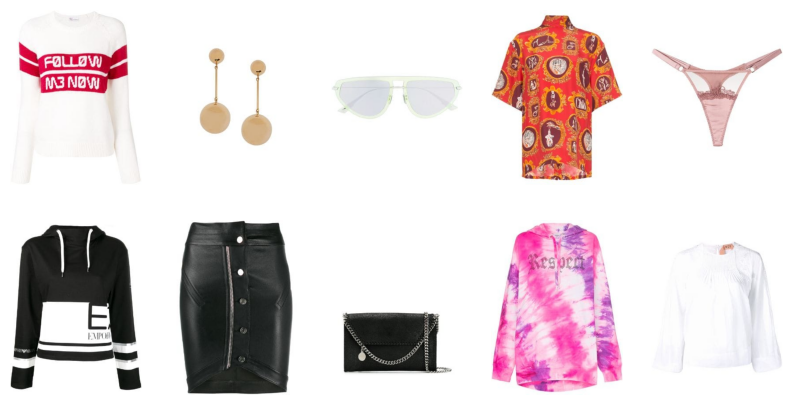


==============Hình ảnh Model==============


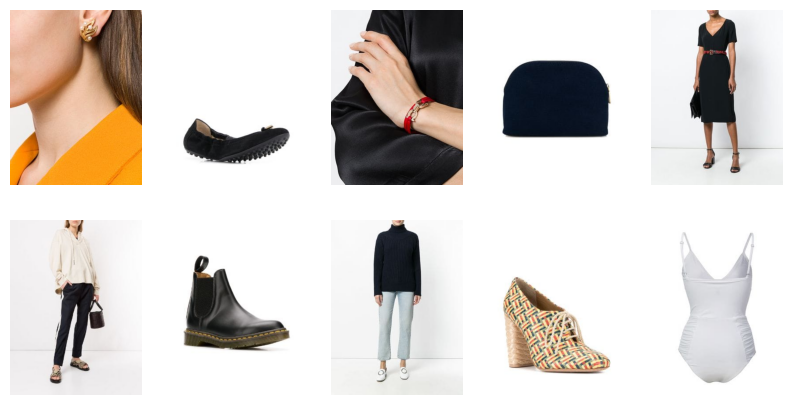

In [20]:
load_images()

In [21]:
# Lưu trữ đường dẫn thư mục vào một biến
cutout_img_dir = "../input/farfetch-listings/cutout-img/cutout"
model_img_dir = "../input/farfetch-listings/model-img/model"

# Liệt kê các thư mục
cutout_images = os.listdir(cutout_img_dir)
model_images = os.listdir(model_img_dir)

In [22]:
def extractImageName(x):
    # Đảo ngược chuỗi đường dẫn hình ảnh
    x_inv = x[::-1]

    # Tìm vị trí của dấu '/'
    slash_idx = x_inv.find('/')

    # Trích xuất phần của chuỗi từ vị trí dấu '/' đến cuối là tên hình ảnh
    return x[-slash_idx:]

# Áp dụng hàm extractImageName cho cột 'images.cutOut' để trích xuất tên hình ảnh cutout và lưu vào cột mới 'cutOutimageNames'
listing_data['cutOutimageNames'] = listing_data['images.cutOut'].apply(lambda x: extractImageName(x))

# Áp dụng hàm extractImageName cho cột 'images.model' để trích xuất tên hình ảnh model và lưu vào cột mới 'modelimageNames'
listing_data['modelimageNames'] = listing_data['images.model'].apply(lambda x: extractImageName(x))


In [23]:
# Chỉ lấy những dữ liệu mà ta có ảnh
listing_data = listing_data[listing_data['cutOutimageNames'].isin(cutout_images)]
listing_data = listing_data[listing_data['modelimageNames'].isin(model_images)]

In [24]:
# Reset the index
listing_data.reset_index(drop=True, inplace=True)

In [25]:
# Add entire paths to cutOut and modelImages
listing_data['cutOutImages_path'] = cutout_img_dir + '/' + listing_data['cutOutimageNames']
listing_data['modelImages_path'] = model_img_dir + '/' + listing_data['modelimageNames']

In [26]:
# Bỏ cột cutOutimageNames, cutOutimageNames
listing_data.drop(['cutOutimageNames', 'cutOutimageNames'], axis=1, inplace=True)

Hình ảnh thể hiện một zebra print scarf dress
Giá: $616
Thương hiệu: Just Cavalli



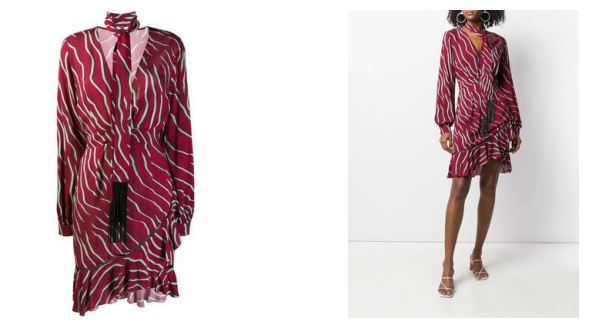

In [27]:
# Chọn ngẫu nhiên một hàng từ dataframe để hiển thị thông tin sản phẩm
random_idx = np.random.randint(low=0, high=listing_data.shape[0] - 1)

# Lấy đường dẫn của hình ảnh cutout và model, giá, mô tả và thương hiệu tương ứng
cutOut_img_path = listing_data.iloc[random_idx]['cutOutImages_path']
model_img_path = listing_data.iloc[random_idx]['modelImages_path']
price = listing_data.iloc[random_idx]['priceInfo.formattedFinalPrice']
desc = listing_data.iloc[random_idx]['shortDescription']
brand = listing_data.iloc[random_idx]['brand.name']

# Load hình ảnh từ đường dẫn
cutOut_img = image.load_img(cutOut_img_path)
cutOut_img_arr = image.img_to_array(cutOut_img, dtype='int')
model_img = image.load_img(model_img_path)
model_img_arr = image.img_to_array(model_img, dtype='int')

# Hiển thị hình ảnh, giá, mô tả và thương hiệu
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
print("Hình ảnh thể hiện một {}".format(desc))
print("Giá: {}".format(price))
print("Thương hiệu: {}".format(brand))
print()
ax[0].imshow(cutOut_img_arr)
ax[1].imshow(model_img_arr)
ax[0].axis('off')
ax[1].axis('off')
plt.show()

In [28]:
my_dict=dict()
for label in listing_data["product_category"]:
    try:
        my_dict[label]+=1
    except:
        my_dict[label]=1
choosen_category=[]
for key in my_dict.keys():
    if my_dict[key]>=100:
        choosen_category.append(key)

In [29]:
len(choosen_category)

100

In [30]:
sub_listing_data=listing_data[listing_data['product_category'].isin(choosen_category)]
sub_listing_data

,brand.id,brand.name,gender,hasSimilarProducts,id,images.cutOut,images.model,isCustomizable,merchandiseLabelField,merchantId,...,priceInfo.formattedFinalPrice,priceInfo.formattedInitialPrice,priceInfo.initialPrice,priceInfo.isOnSale,shortDescription,stockTotal,product_category,modelimageNames,cutOutImages_path,modelImages_path
0,8360,Miu Miu,women,True,13415450,https://cdn-images.farfetch-contents.com/13/41...,https://cdn-images.farfetch-contents.com/13/41...,False,NoTag,9359,...,"$1,080","$1,080",1080,False,logo print strap sandals,130,sandals,13415450_17798961_300.jpg,../input/farfetch-listings/cutout-img/cutout/1...,../input/farfetch-listings/model-img/model/134...
1,2049368,Self-Portrait,women,True,13784566,https://cdn-images.farfetch-contents.com/13/78...,https://cdn-images.farfetch-contents.com/13/78...,False,NoTag,9319,...,$392,$490,490,True,embroidered midi dress,14,dress,13784566_17127308_300.jpg,../input/farfetch-listings/cutout-img/cutout/1...,../input/farfetch-listings/model-img/model/137...
2,15514,Fendi,women,True,13377441,https://cdn-images.farfetch-contents.com/13/37...,https://cdn-images.farfetch-contents.com/13/37...,False,NoTag,9140,...,"$1,245","$1,245",1245,False,FendiMania sock style sneakers,68,sneakers,13377441_15308566_300.jpg,../input/farfetch-listings/cutout-img/cutout/1...,../input/farfetch-listings/model-img/model/133...
3,49486,A.P.C.,women,False,13744082,https://cdn-images.farfetch-contents.com/13/74...,https://cdn-images.farfetch-contents.com/13/74...,False,NoTag,9031,...,$308,$385,385,True,top zip wallet,1,wallet,13744082_16970244_300.jpg,../input/farfetch-listings/cutout-img/cutout/1...,../input/farfetch-listings/model-img/model/137...
4,34624,Prada,women,True,13668256,https://cdn-images.farfetch-contents.com/13/66...,https://cdn-images.farfetch-contents.com/13/66...,False,NoTag,9339,...,"$1,248","$1,248",1248,False,slingback 65 pumps,78,pumps,13668256_16606027_300.jpg,../input/farfetch-listings/cutout-img/cutout/1...,../input/farfetch-listings/model-img/model/136...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188812,59394,Fornasetti,unisex,False,10047577,https://cdn-images.farfetch-contents.com/10/04...,https://cdn-images.farfetch-contents.com/10/04...,False,NoTag,9089,...,$207,$207,207,False,face print plate,6,plate,10047577_262115_300.jpg,../input/farfetch-listings/cutout-img/cutout/1...,../input/farfetch-listings/model-img/model/100...
188813,59394,Fornasetti,unisex,False,10047571,https://cdn-images.farfetch-contents.com/10/04...,https://cdn-images.farfetch-contents.com/10/04...,False,NoTag,9089,...,$207,$207,207,False,boss print plate,2,plate,10047571_262109_300.jpg,../input/farfetch-listings/cutout-img/cutout/1...,../input/farfetch-listings/model-img/model/100...
188814,59394,Fornasetti,unisex,False,10047569,https://cdn-images.farfetch-contents.com/10/04...,https://cdn-images.farfetch-contents.com/10/04...,False,NoTag,9089,...,$207,$207,207,False,face print plate,2,plate,10047569_262103_300.jpg,../input/farfetch-listings/cutout-img/cutout/1...,../input/farfetch-listings/model-img/model/100...
188815,59394,Fornasetti,unisex,False,10047567,https://cdn-images.farfetch-contents.com/10/04...,https://cdn-images.farfetch-contents.com/10/04...,False,NoTag,9089,...,$207,$207,207,False,whisker print plate,10,plate,10047567_262100_300.jpg,../input/farfetch-listings/cutout-img/cutout/1...,../input/farfetch-listings/model-img/model/100...


In [31]:
def map_labels(label):
    # Khai báo các nhóm chính và các từ đồng nghĩa của chúng
    label_groups = {
        'matkinh': ['glasses', 'sunglasses'],
        'tatchan': ['socks'],
        'dongho': ['watch'],
        'dep': ['sandals', 'slides'],
        'giaycode': ['sneakers', 'boots', 'loafers', 'ballerinas', 'espadrilles', 'flats', 'trainers', 'booties', 'slippers', 'shoes'],
        'giaycaogot': ['pumps', 'mules'],
        'vi': ['wallet', 'purse', 'cardholder', 'holder'],
        'tuixach': ['bag', 'satchel', 'clutch', 'tote', 'pouch', 'handbag', 'crossbody'],
        'balo': ['backpack'],
        'daymockhoa': ['keyring'],
        'daydeo': ['strap'],
        'opdienthoai': ['case'],
        'aocanh': ['blouse', 'top', 'tunic'],
        'aophong': ['t-shirt', 'shirt'],
        'aolenni': ['sweater', 'cardigan', 'jumper', 'sweatshirt', 'pullover', 'hoodie'],
        'aongunu': ['camisole'],
        'quanaudai': ['trousers', 'pants', 'culottes', 'bottoms', 'bottom'],
        'quanjean': ['jeans'],
        'quanshort': ['shorts'],
        'vay': ['skirt', 'gown', 'dress'],
        'quanlegging': ['leggings'],
        'quanlot': ['briefs', 'thong'],
        'aokhoacdai': ['coat', 'blazer', 'parka', 'raincoat'],
        'aokhoangan': ['jacket', 'cape'],
        'aovest': ['vest', 'suit'],
        'aoghile': ['waistcoat', 'gilet'],
        'aochoang': ['poncho', 'shawl'],
        'aolotnguc': ['bra'],
        'bodysuit': ['bodysuit', 'body'],
        'jumpsuit': ['jumpsuit', 'playsuit'],
        'aoquanboi': ['swimsuit', 'bikini'],
        'khanco': ['scarf'],
        'mu': ['hat', 'cap'],
        'gangtay': ['gloves'],
        'caibangdau': ['headband'],
        'trangsucnho': ['hoops', 'ring', 'brooch', 'cuff', 'bangle', 'bracelet', 'earring', 'earrings'],
        'daychuyen': ['necklace', 'pendant'],
        'thatlung': ['belt'],
        'charm': ['charm'],
        'mulen': ['beanie'],
        'nen': ['candle'],
        'lythuytinh': ['glass'],
        'caidia': ['plate'],
        'unknown': ['detail', 'set']
    }
    
    # Kiểm tra từng nhóm và từng từ đồng nghĩa của nó
    for group, labels in label_groups.items():
        if label in labels:  # Nếu nhãn thuộc về nhóm đang xét
            return group  # Trả về tên nhóm tương ứng
    
    # Trả về nhãn ban đầu nếu không tìm thấy phù hợp
    return 'unknown'

In [32]:
train_dict=dict()
train_index=[]
for i in range(len(sub_listing_data)):
    label=sub_listing_data.iloc[i]['product_category']
    try: 
        train_dict[label]+=1
    except:
        train_dict[label]=1
    if train_dict[label]<=80:
        train_index.append(i)

In [33]:
train_data=sub_listing_data.iloc[train_index]

In [34]:
indexes_to_drop = train_data[(train_data['product_category'] == 'detail') | (train_data['product_category'] == 'set')].index
train_data=train_data.drop(indexes_to_drop)

In [35]:
train_data["product_category"]=train_data["product_category"].map(lambda x: map_labels(x))

In [36]:
len(train_data['product_category'].unique())

43

In [37]:
train_data['product_category'].value_counts()

product_category
giaycode       800
trangsucnho    640
tuixach        560
aolenni        480
quanaudai      400
vi             320
aokhoacdai     320
aocanh         240
vay            240
giaycaogot     160
dep            160
jumpsuit       160
bodysuit       160
aophong        160
mu             160
aoquanboi      160
matkinh        160
aokhoangan     160
aochoang       160
aovest         160
quanlot        160
daychuyen      160
aoghile        160
balo            80
khanco          80
quanshort       80
quanjean        80
caibangdau      80
aolotnguc       80
thatlung        80
gangtay         80
charm           80
tatchan         80
quanlegging     80
daydeo          80
mulen           80
opdienthoai     80
daymockhoa      80
dongho          80
aongunu         80
nen             80
lythuytinh      80
caidia          80
Name: count, dtype: int64

In [38]:
train_data['product_category'].count()

7840

In [39]:
train_data.to_csv("/kaggle/working/train_data.csv")

In [40]:
test_dict=dict()
test_index=[]
for i in range(len(sub_listing_data)):
    if i in train_index: continue
    label=sub_listing_data.iloc[i]['product_category']
    try: 
        test_dict[label]+=1
    except:
        test_dict[label]=1
    if test_dict[label]<=20:
        test_index.append(i)

In [41]:
test_data=sub_listing_data.iloc[test_index]

In [42]:
indexes_to_drop = test_data[(test_data['product_category'] == 'detail') | (test_data['product_category'] == 'set')].index
test_data=test_data.drop(indexes_to_drop)

In [43]:
test_data["product_category"]=test_data["product_category"].map(lambda x: map_labels(x))

In [44]:
len(test_data["product_category"].unique())

43

In [45]:
test_data['product_category'].value_counts()

product_category
giaycode       200
trangsucnho    160
tuixach        140
aolenni        120
quanaudai      100
vi              80
aokhoacdai      80
vay             60
aocanh          60
aophong         40
aokhoangan      40
aoghile         40
giaycaogot      40
matkinh         40
dep             40
daychuyen       40
aoquanboi       40
mu              40
jumpsuit        40
aovest          40
quanlot         40
bodysuit        40
aochoang        40
quanjean        20
balo            20
khanco          20
thatlung        20
opdienthoai     20
aolotnguc       20
tatchan         20
quanshort       20
quanlegging     20
daymockhoa      20
dongho          20
gangtay         20
mulen           20
daydeo          20
charm           20
lythuytinh      20
caibangdau      20
aongunu         20
nen             20
caidia          20
Name: count, dtype: int64

In [46]:
test_data['product_category'].count()

1960

In [47]:
test_data.to_csv("/kaggle/working/test_data.csv")

In [ ]:
def show_image(train_data, label, column='product_category'):
    # Lọc các ảnh có nhãn bằng label
    filtered_data = train_data[train_data[column] == label]
    
    # Lấy ra 10 ảnh đầu tiên
    sample_data = filtered_data.head(20)
    
    # Hiển thị các ảnh
    plt.figure(figsize=(20, 10))
    for i, img_path in enumerate(sample_data['cutOutImages_path']):
        img = Image.open(img_path)
        plt.subplot(2, 10, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Label: {label}")
    plt.show()
show_image(train_data,"opdienthoai")

# Image Search Engine using Keras and Tensorflow

In [ ]:
'''
So sánh 3 mô hình khác nhau

1. VGG 16
2. ResNet 50
3. Xception
'''

class FeatureExtractor:
    
    # Constructor (hàm khởi tạo)
    def __init__(self, arch='VGG'):
        
        self.arch = arch
        
        # Sử dụng VGG-16 với trọng số từ ImageNet
        if self.arch == 'VGG':
            base_model = VGG16(weights='imagenet')
            self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)
        
        # Sử dụng ResNet 50 với trọng số từ ImageNet
        elif self.arch == 'ResNet':
            base_model = ResNet50(weights='imagenet')
            self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)
        
        # Sử dụng Xception với trọng số từ ImageNet
        elif self.arch == 'Xception':
            base_model = Xception(weights='imagenet')
            self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)
            
    # Phương thức trích xuất đặc trưng hình ảnh
    def extract_features(self, img):
        
        # Mô hình VGG 16 & ResNet 50 yêu cầu kích thước ảnh đầu vào là 224x224, còn Xception là 299x299
        if self.arch == 'VGG' or self.arch == 'ResNet':
            img = img.resize((224, 224))
        elif self.arch == 'Xception':
            img = img.resize((299, 299))
        
        # Chuyển đổi kênh ảnh sang RGB
        img = img.convert('RGB')
        
        # Chuyển đổi ảnh thành mảng (array)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        
        # Tiền xử lý đầu vào theo mô hình tương ứng
        if self.arch == 'VGG':
            x = vgg_preprocess(x)
            
        elif self.arch == 'ResNet':
            x = resnet_preprocess(x)
            
        elif self.arch == 'Xception':
            x = xception_preprocess(x)
        
        # Trích xuất đặc trưng
        features = self.model.predict(x)
        
        # Chuẩn hóa (scale) các đặc trưng
        features = features / np.linalg.norm(features)
        
        return features

## Feature Extractor

* VGG 19
* ResNet 50
* Xception

In [50]:
train_data=train_data.reset_index()
test_data=test_data.reset_index()

In [51]:
cutOutImages_train=train_data["cutOutImages_path"]
labels_train=train_data["product_category"]

In [52]:
cutOutImages_test=test_data["cutOutImages_path"]
labels_test=test_data["product_category"]

**1. ResNet 50**

***
* ResNet stands for Residual Network. 
* The ResNet 50 is a 50 layer deep network.
* It had a special unit or a special connection called the skip connections, which allowed to train these deep layered models effeciently.
* In the skip connection, the inputs are directly connected to the output layer. Then the network is forced to model h(x) - x, where h(x) hypothesis function and x is the input. This is called residual learning as we are modelling the residuals (errors).
* ResNet is also available in 34 layers as well as 152 layers deep networks.
***

In [53]:
resnet_feature_extractor = FeatureExtractor(arch='ResNet')
vgg_feature_extractor = FeatureExtractor(arch='VGG')
xception_feature_extractor = FeatureExtractor(arch='Xception')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step
91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Tạo đối tượng mô hình và trích xuất đặc trưng của 8000 hình ảnh hàng đầu (ResNet)
resnet_feature_extractor = FeatureExtractor(arch='ResNet')  # Khởi tạo đối tượng trích xuất đặc trưng với mô hình ResNet

#Lưu trữ các đặc trưng và label của hình ảnh
X_train,y_train=[],[]
for i,(img_path,label) in enumerate(zip(cutOutImages_train, labels_train)):
    # Trích xuất đặc trưng và lưu vào dictionary
    img = image.load_img(img_path)  # Đọc ảnh từ đường dẫn
    feature = resnet_feature_extractor.extract_features(img) 
    X_train.append(feature)
    y_train.append(label)
    print(f"{i} success")
    
X_train = np.array(X_train)
y_train = np.array(y_train)

# Lưu các đặc trưng và nhãn vào các tệp .npy
np.savez('train_data_resnet.npz', X_train=X_train, y_train=y_train)

In [ ]:
# Tạo đối tượng mô hình và trích xuất đặc trưng của 2000 hình ảnh hàng đầu (ResNet)
resnet_feature_extractor = FeatureExtractor(arch='ResNet')  # Khởi tạo đối tượng trích xuất đặc trưng với mô hình ResNet

#Lưu trữ các đặc trưng và label của hình ảnh
X_test,y_test=[],[]
for i,(img_path,label) in enumerate(zip(cutOutImages_test, labels_test)):
    # Trích xuất đặc trưng và lưu vào dictionary
    img = image.load_img(img_path)  # Đọc ảnh từ đường dẫn
    feature = resnet_feature_extractor.extract_features(img) 
    X_test.append(feature)
    y_test.append(label)
    print(f"{i} success")
    
X_test = np.array(X_test)
y_test = np.array(y_test)

# Lưu các đặc trưng và nhãn vào các tệp .npy
np.savez('test_data_resnet.npz', X_test=X_test, y_test=y_test)

**2. VGG 16**

***
* A relatively simple architecture.
* Consists of 2 or 3 convolutional layers followed by a pooling layer, then again 2 or 3 convolutional layers and a pooling layer.
* The VGG architecture reaches upto either 16 or 19 layered network depending on the variant. (In this case, I have used VGG 16, i.e the 16 layered variant.)
***

In [ ]:
# Tạo đối tượng mô hình và trích xuất đặc trưng của 8000 hình ảnh hàng đầu (VGG 16)
vgg_feature_extractor = FeatureExtractor(arch='VGG')  # Khởi tạo đối tượng trích xuất đặc trưng với mô hình VGG 16

#Lưu trữ các đặc trưng và label của hình ảnh
X_train,y_train=[],[]
for i,(img_path,label) in enumerate(zip(cutOutImages_train, labels_train)):
    # Trích xuất đặc trưng và lưu vào dictionary
    img = image.load_img(img_path)  # Đọc ảnh từ đường dẫn
    feature = vgg_feature_extractor.extract_features(img) 
    X_train.append(feature)
    y_train.append(label)
    print(f"{i} success")

X_train = np.array(X_train)
y_train = np.array(y_train)

# Lưu các đặc trưng và nhãn vào các tệp .npy
np.savez('train_data_vgg.npz', X_train=X_train, y_train=y_train)

In [ ]:
# Tạo đối tượng mô hình và trích xuất đặc trưng của 8000 hình ảnh hàng đầu (VGG 16)
vgg_feature_extractor = FeatureExtractor(arch='VGG')  # Khởi tạo đối tượng trích xuất đặc trưng với mô hình VGG 16

#Lưu trữ các đặc trưng và label của hình ảnh
X_test,y_test=[],[]
for i,(img_path,label) in enumerate(zip(cutOutImages_test, labels_test)):
    # Trích xuất đặc trưng và lưu vào dictionary
    img = image.load_img(img_path)  # Đọc ảnh từ đường dẫn
    feature = vgg_feature_extractor.extract_features(img) 
    X_test.append(feature)
    y_test.append(label)
    print(f"{i} success")
    
X_test = np.array(X_test)
y_test = np.array(y_test)

# Lưu các đặc trưng và nhãn vào các tệp .npy
np.savez('test_data_vgg.npz', X_test=X_test, y_test=y_test)

**3. Xception**
***
* Xception stands for Extreme Inception (Inception is another CNN architecture).
* There is a special type of layer in this architecture called depthwise separable convolution layer.
* A normal convolution layer tries to simultaneously capture both spatial patterns (eg. Oval, Square, Circle) and cross-channel patterns (eg. Face, Nose, Ears etc).
* A depthwise separable convolution layers makes an assumption that both these patterns (spatial & cross-channel) can be modeled separately.
* Hence, the depthwise separable convolution layer consists of 2 parts. The first part looks for the spatial patterns while the second part looks for the cross channel patterns.
***

In [ ]:
# Tạo đối tượng mô hình và trích xuất đặc trưng của 8000 hình ảnh hàng đầu (Xception)
xception_feature_extractor = FeatureExtractor(arch='Xception')  # Khởi tạo đối tượng trích xuất đặc trưng với mô hình Xception

#Lưu trữ các đặc trưng và label của hình ảnh
X_train,y_train=[],[]
for i,(img_path,label) in enumerate(zip(cutOutImages_train, labels_train)):
    # Trích xuất đặc trưng và lưu vào dictionary
    img = image.load_img(img_path)  # Đọc ảnh từ đường dẫn
    feature = xception_feature_extractor.extract_features(img) 
    X_train.append(feature)
    y_train.append(label)
    print(f"{i} success")
    
X_train = np.array(X_train)
y_train = np.array(y_train)

# Lưu các đặc trưng và nhãn vào các tệp .npy
np.savez('train_data_xception.npz', X_train=X_train, y_train=y_train)

In [ ]:
# Tạo đối tượng mô hình và trích xuất đặc trưng của 2000 hình ảnh hàng đầu (Xception)
xception_feature_extractor = FeatureExtractor(arch='Xception')  # Khởi tạo đối tượng trích xuất đặc trưng với mô hình Xception

#Lưu trữ các đặc trưng và label của hình ảnh
X_test,y_test=[],[]
for i,(img_path,label) in enumerate(zip(cutOutImages_test, labels_test)):
    # Trích xuất đặc trưng và lưu vào dictionary
    img = image.load_img(img_path)  # Đọc ảnh từ đường dẫn
    feature = xception_feature_extractor.extract_features(img) 
    X_test.append(feature)
    y_test.append(label)
    print(f"{i} success")
    
X_test = np.array(X_test)
y_test = np.array(y_test)

# Lưu các đặc trưng và nhãn vào các tệp .npy
np.savez('test_data_xception.npz', X_test=X_test, y_test=y_test)

# Evaluation

In [55]:
data_resnet = np.load('/kaggle/input/cv-data/train_data_resnet.npz')
X_train_resnet = data_resnet['X_train']
y_train_resnet = data_resnet['y_train']

print("X_train_resnet shape:", X_train_resnet.shape)
print("y_train_resnet shape:", y_train_resnet.shape)

X_train_resnet shape: (7840, 1, 2048)
y_train_resnet shape: (7840,)


In [56]:
data_resnet = np.load('/kaggle/input/cv-data/test_data_resnet.npz')
X_test_resnet = data_resnet['X_test']
y_test_resnet = data_resnet['y_test']

print("X_test_resnet shape:", X_test_resnet.shape)
print("y_test_resnet shape:", y_test_resnet.shape)

X_test_resnet shape: (1960, 1, 2048)
y_test_resnet shape: (1960,)


In [57]:
data_vgg = np.load('/kaggle/input/cv-data/train_data_vgg.npz')
X_train_vgg = data_vgg['X_train']
y_train_vgg = data_vgg['y_train']

print("X_train_vgg shape:", X_train_vgg.shape)
print("y_train_vgg shape:", y_train_vgg.shape)

X_train_vgg shape: (7840, 1, 4096)
y_train_vgg shape: (7840,)


In [58]:
data_vgg = np.load('/kaggle/input/cv-data/test_data_vgg.npz')
X_test_vgg = data_vgg['X_test']
y_test_vgg = data_vgg['y_test']

print("X_test_vgg shape:", X_test_vgg.shape)
print("y_test_vgg shape:", y_test_vgg.shape)

X_test_vgg shape: (1960, 1, 4096)
y_test_vgg shape: (1960,)


In [59]:
data_xception = np.load('/kaggle/input/cv-data/train_data_xception.npz')
X_train_xception = data_xception['X_train']
y_train_xception = data_xception['y_train']

print("X_train_xception shape:", X_train_xception.shape)
print("y_train_xception shape:", y_train_xception.shape)

X_train_xception shape: (7840, 1, 2048)
y_train_xception shape: (7840,)


In [60]:
data_xception = np.load('/kaggle/input/cv-data/test_data_xception.npz')
X_test_xception = data_xception['X_test']
y_test_xception = data_xception['y_test']

print("X_test_xception shape:", X_test_xception.shape)
print("y_test_xception shape:", y_test_xception.shape)

X_test_xception shape: (1960, 1, 2048)
y_test_xception shape: (1960,)


# Evaluation 

In [80]:
!pip install faiss-gpu

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 17.9 MB/s eta 0:00:00:00:0100:01


In [62]:
import faiss

def compute_ap(ranked_labels, true_label):
    """
    Tính toán Average Precision cho một mẫu
    """
    num_relevant = 0
    precision_sum = 0
    for i, label in enumerate(ranked_labels):
        if label == true_label:
            num_relevant += 1
            precision_sum += num_relevant / (i + 1)
    if num_relevant == 0:
        return 0
    return precision_sum / num_relevant

def mAP(X_train, y_train, X_test, y_test, k=10):
    """
    Tính toán mean Average Precision (mAP) sử dụng FAISS
    """
    
    X_train=X_train.reshape(X_train.shape[0],-1)
    X_test=X_test.reshape(X_test.shape[0],-1)

    # Khởi tạo FAISS index
    d = X_train.shape[1]
    index = faiss.IndexFlatL2(d)
    
    # Thêm dữ liệu huấn luyện vào chỉ mục
    index.add(X_train)

    # Tìm k láng giềng gần nhất cho các mẫu trong X_test
    D, I = index.search(X_test, k)

    ap_list = []
    
    for i in range(len(X_test)):
        # Lấy nhãn của k láng giềng gần nhất
        ranked_labels = y_train[I[i]]
        true_label = y_test[i]
        
        # Tính toán Average Precision cho mẫu hiện tại
        ap = compute_ap(ranked_labels, true_label)
        ap_list.append(ap)
    
    # Tính toán mean Average Precision
    mAP_value = np.mean(ap_list)
    return mAP_value

In [68]:
mAP(X_train_resnet,y_train_resnet,X_test_resnet,y_test_resnet,k=10)

0.7132500927147125

In [64]:
mAP(X_train_xception,y_train_xception,X_test_xception,y_test_xception,k=10)

0.7239816094663489

In [66]:
def test_model(X_train, y_train,X_test,y_test,train_data, test_data,feature_idx, k=5):
    """
    Hiển thị ảnh feature và top k ảnh giống với feature nhất từ X_train và hiển thị nhãn tương ứng.
    
    Args:
    - X_train (numpy array): Mảng các đặc trưng của ảnh huấn luyện.
    - y_train (list or numpy array): Danh sách các nhãn tương ứng với X_train.
    - train_data (DataFrame): DataFrame chứa đường dẫn tới các ảnh huấn luyện và nhãn.
    - test_data (DataFrame): DataFrame chứa đường dẫn tới các ảnh kiểm tra và nhãn.
    - feature_idx (int): Chỉ số của ảnh cần tìm kiếm trong test_data.
    - k (int): Số lượng ảnh cần hiển thị.
    """
    # Chuyển đổi dữ liệu sang kiểu float32
    X_train=X_train.reshape(X_train.shape[0],-1)
    X_test=X_test.reshape(X_test.shape[0],-1)
    
    feature = X_test[feature_idx].reshape(1, -1)
    # Khởi tạo FAISS index
    d = X_train.shape[1]
    index = faiss.IndexFlatL2(d)
    
    # Thêm dữ liệu huấn luyện vào chỉ mục
    index.add(X_train)
    
    # Tìm k láng giềng gần nhất cho feature
    D, I = index.search(feature, k)
    
    # Lấy đường dẫn của ảnh feature
    feature_img_path = test_data.iloc[feature_idx]['cutOutImages_path']
    
    # Hiển thị ảnh feature
    plt.figure(figsize=(20, 10))
    plt.subplot(1, k + 1, 1)
    feature_img = Image.open(feature_img_path)
    plt.imshow(feature_img)
    plt.axis('off')
    plt.title(f"Feature Image\nLabel: {test_data.iloc[feature_idx]['product_category']}")
    
    # Hiển thị các ảnh tương tự và nhãn tương ứng
    for i, idx in enumerate(I[0]):
        img_path = train_data.iloc[idx]['cutOutImages_path']
        img = Image.open(img_path)
        plt.subplot(1, k + 1, i + 2)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Label: {train_data.iloc[idx]['product_category']}")
    
    plt.show()

5


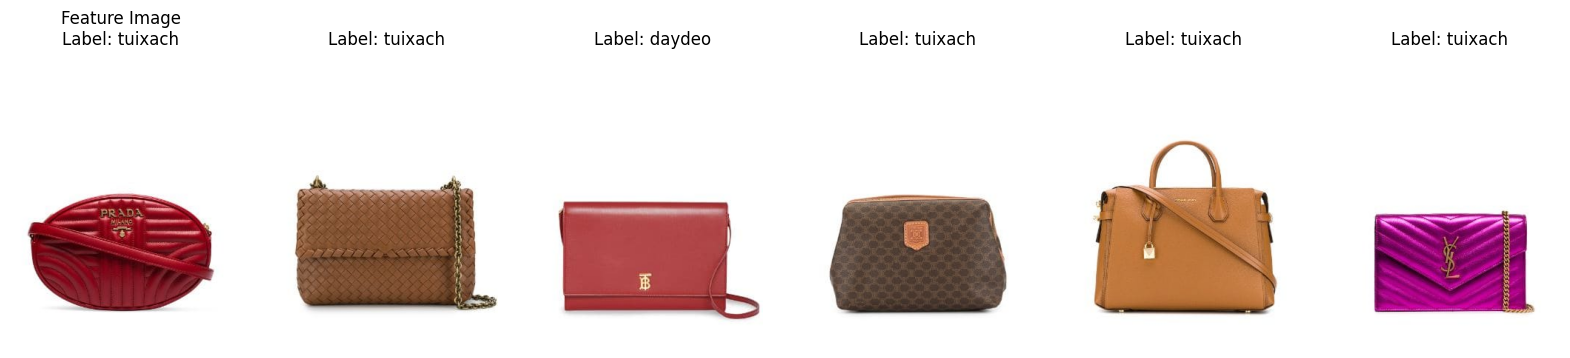

22


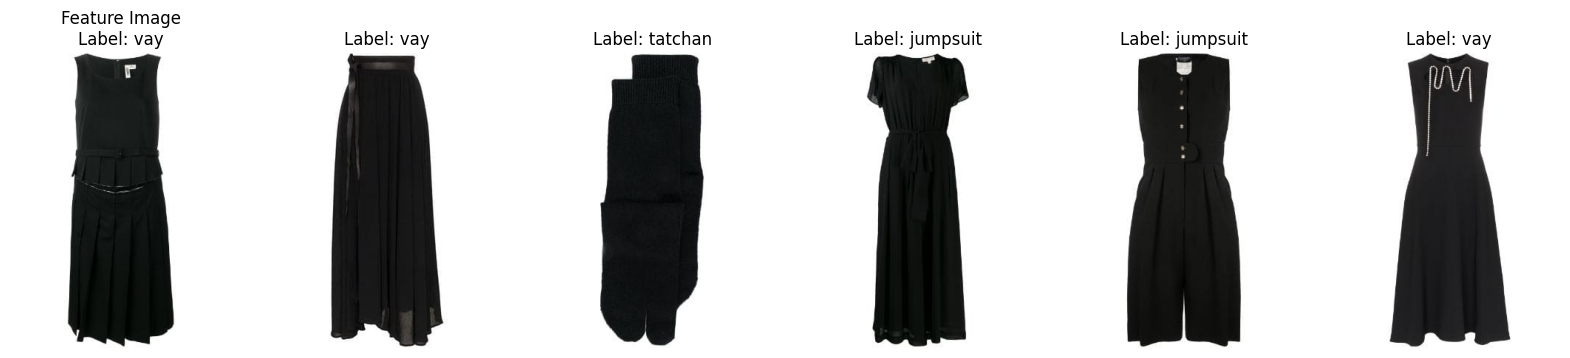

24


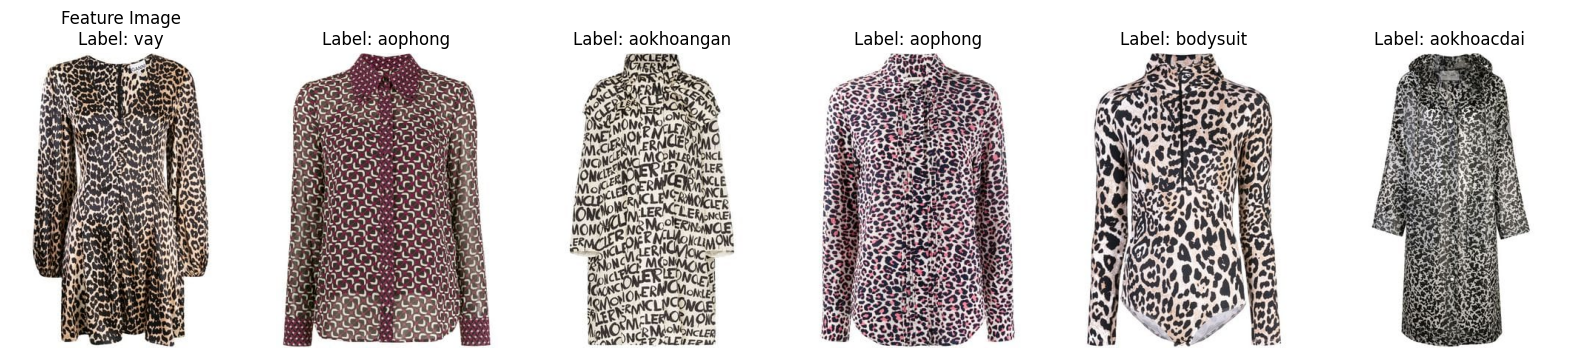

19


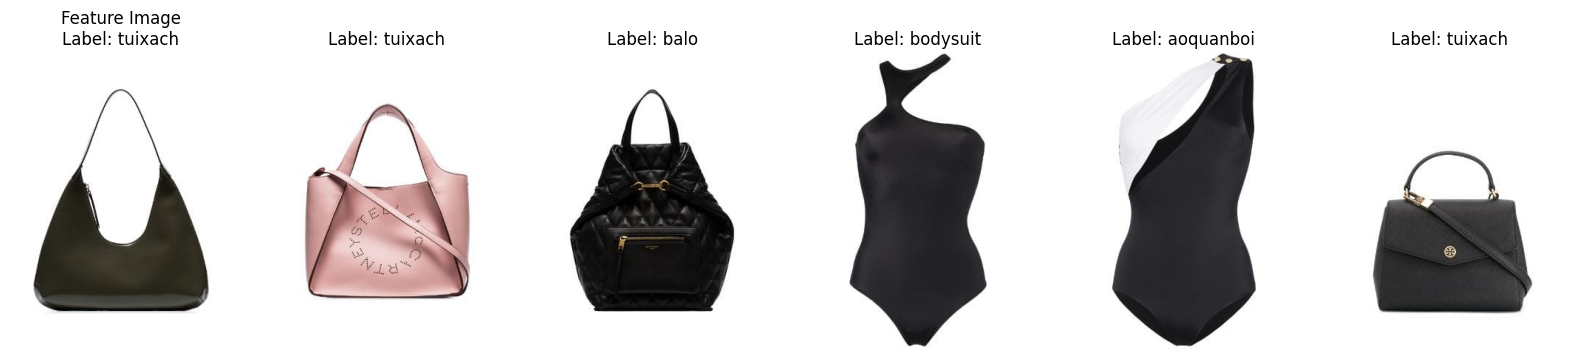

29


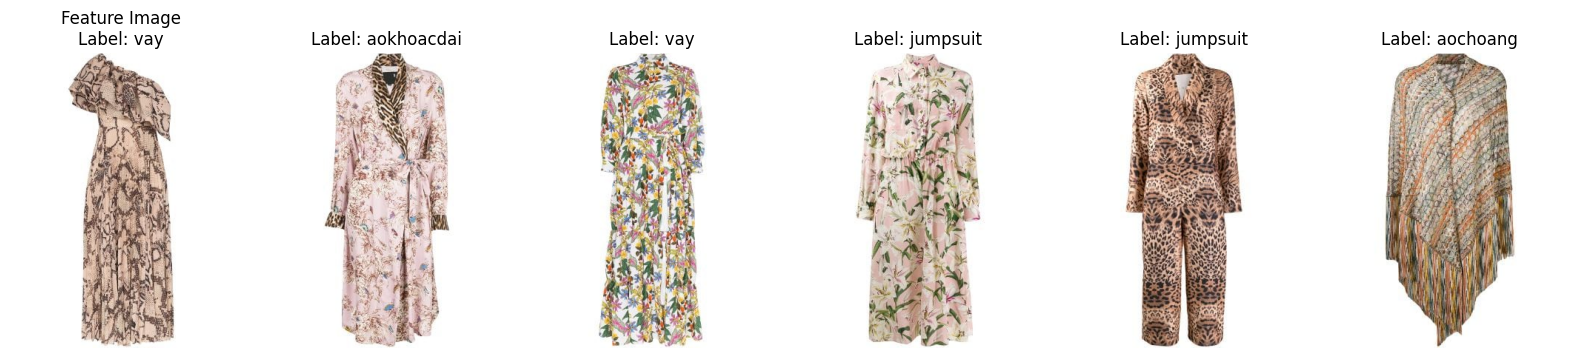

73


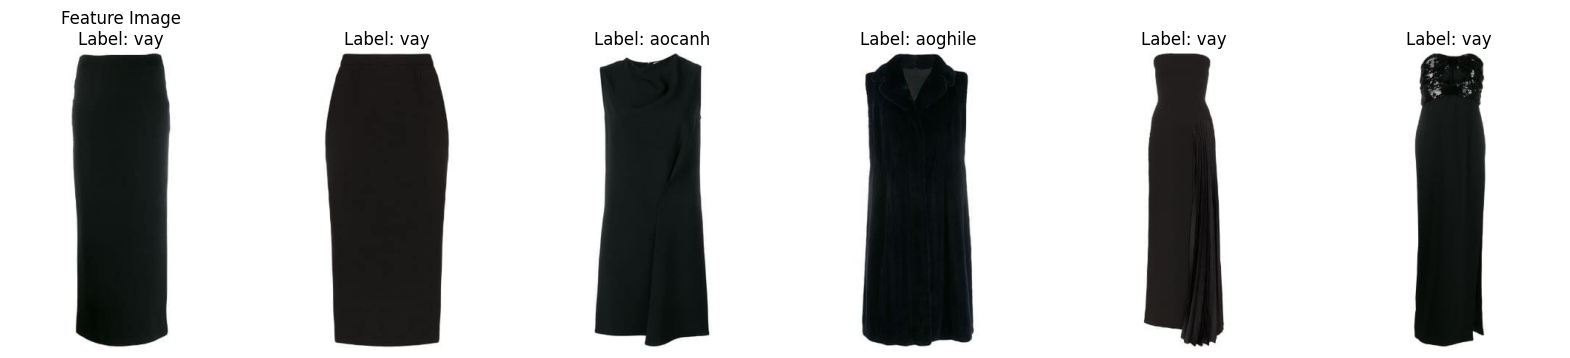

In [67]:
a = [5, 22, 24, 19, 29, 73]
for i in a:
    print(i)
    test_model(X_train_vgg,y_train_vgg,X_test_vgg,y_test_vgg,train_data,test_data,i) # đổi sang loại feature của model khác nếu muốn test nó